# **MNIST**

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. It was created by "re-mixing" the samples from NIST's original datasets. The creators felt that since NIST's training dataset was taken from American Census Bureau employees, while the testing dataset was taken from American high school students, it was not well-suited for machine learning experiments. Furthermore, the black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset. The original creators of the database keep a list of some of the methods tested on it. 

Source : https://en.wikipedia.org/wiki/MNIST_database

# 1. Importing MNIST Data Set

In [1]:
from keras.datasets import mnist
(train_img, train_labels) = mnist.load_data()[0]
(test_img, test_labels) = mnist.load_data()[1]

Using TensorFlow backend.


11493376/11490434 [==============================] - 12s 1us/step


In [2]:
print("Shape of Train Images: ",train_img.shape)
print("Shape of Test Images: ",test_img.shape)

Shape of Train Images:  (60000, 28, 28)
Shape of Test Images:  (10000, 28, 28)


Let's check some pictures in dataset with different methods.

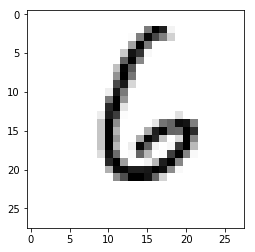

In [3]:
import matplotlib.pyplot as plt

plt.imshow(train_img[32], cmap='gray_r')
plt.show()


In [4]:
for row in train_img[32]:
    for i in row:
        print("%3s "%i, end='')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 132 255 225  12   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   3 128 246 183 128  46   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0  91 254 134   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0  54 235 204   7   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0 158 252 120   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  63 251 165   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0 107 254 138   0   0   0   0   0   0   0   0   0   0 

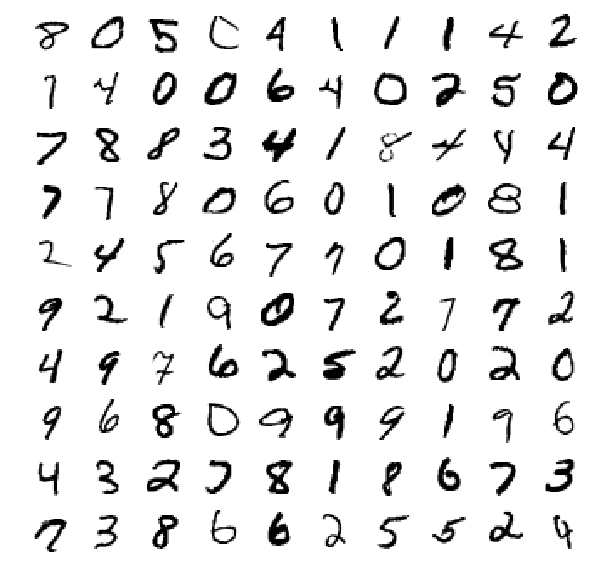

In [5]:
import numpy as np

n, k, figsize = 10, 10, (10, 10)
fig, ax = plt.subplots(n, k, figsize=figsize)
for i in range(n):
    for j in range(k):
        ax[i,j].imshow(train_img[np.random.randint(train_img.shape[0])], cmap='gray_r')
        ax[i,j].axis('off')

plt.show()

In [6]:
train_img = train_img.reshape((60000,28*28))
train_img = train_img.astype("float32")/255

test_img = test_img.reshape((10000,28*28))
test_img = test_img.astype("float32")/255

In [7]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# 2. Neural Network

Two layer network

In [8]:
from keras import models
from keras import layers

In [9]:
model = models.Sequential()
model.add(layers.Dense(512,activation="relu", input_shape=(28*28,)))
model.add(layers.Dense(10,activation="softmax"))

In [10]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# 3. Train model


We can check *loss* ve *accuracy* 

In [11]:
history = model.fit(train_img,
                    train_labels,
                    epochs=10,
                    batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 11s 190us/step - loss: 0.2537 - accuracy: 0.9269
Epoch 2/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1037 - accuracy: 0.9694
Epoch 3/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0687 - accuracy: 0.9792
Epoch 4/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0496 - accuracy: 0.9850
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0375 - accuracy: 0.9890
Epoch 6/10
60000/60000 [==============================] - 6s 97us/step - loss: 0.0280 - accuracy: 0.9921
Epoch 7/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0217 - accuracy: 0.9936
Epoch 8/10
60000/60000 [==============================] - 6s 98us/step - loss: 0.0166 - accuracy: 0.9951 0s - loss: 0.0168 - ac
Epoch 9/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0127 - accuracy: 0.9965
Epoch 10/10
60000/60000 [===

In [12]:
history_dict = history.history
print("Keys: ",history_dict.keys())

Keys:  dict_keys(['loss', 'accuracy'])


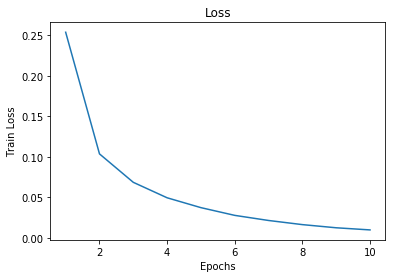

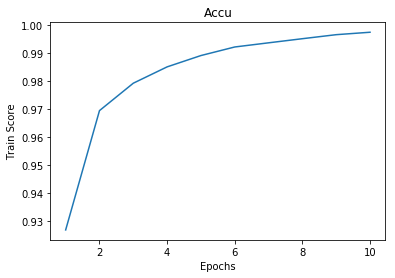

In [15]:
import matplotlib.pyplot as plt

epochs = range(1,11)
loss = history_dict['loss']
accuracy = history_dict['accuracy']

plt.plot(epochs,loss)
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.show()

plt.plot(epochs,accuracy)
plt.title("Accu")
plt.xlabel("Epochs")
plt.ylabel("Train Score")
plt.show()

In [14]:
test_loss, test_acc = model.evaluate(test_img, test_labels)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

10000/10000 [==============================] - 1s 79us/step
Test Loss:  0.06645479217055836
Test Accuracy:  0.9819999933242798
